In [ ]:
#https://creativecommons.org/licenses/by/4.0/

This file aims at creating a useful pandas-based dataframework for each subject.

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import scipy.io
import pandas as pd
from glob import glob
import os
import time
from scipy import signal

Channels and sampling frequency

In [2]:
fs = 2048 #Hz, sampling frequency
n_ch = 8 #channles in one row (or column) of one set
n_ch_tot = (n_ch**2)*3 #total channels

## Subject 1

Create dataframe

In [3]:
columns = ['task','trial',
           'set1','set2','set3',
          't_steps', 'time_duration']#,
           #'info', 'side','gain','filt_parameters','notes']
        #to add further info

#add channels as predictors

for i in range(n_ch_tot):
    columns.append('ch'+str(i+1),)

df = pd.DataFrame(columns=columns)

In [4]:
task_names = ['iso',
              'bottle',
              'screw',
              'knife',
              'hammer',
              'peg',
              'free_eating',
              'jar', 
              'typing',
              'swing']

Load all files from subject 1

In [5]:
for task_num, task_name in enumerate(task_names):
    
    files_list = glob(os.path.join('20181024_KONSENS_recordings/S1/', '*'+task_name+'*.mat'))
                      
    for file_num, file_name in enumerate(sorted(files_list)):
        print (file_name) #print loaded files
        mat = scipy.io.loadmat(file_name)
        set1_temp = np.array(mat["EMG_array"][0][0]['data'][0][0]) #first or second index? check with trial 1
        set2_temp = np.array(mat["EMG_array"][0][1]['data'][0][0])
        set3_temp = np.array(mat["EMG_array"][0][2]['data'][0][0])
        
        set1 = [] #batches to reshape data in 64 x time_steps matrices
        set2 = []
        set3 = []
        
        for i in range(n_ch):
            for j in range(n_ch):
                set1.append(np.squeeze(set1_temp[i][j]))
                set2.append(np.squeeze(set2_temp[i][j]))
                set3.append(np.squeeze(set3_temp[i][j]))
                
                #add channels as predictors
                #df = df.append({('ch'+str(1+n_ch*i+j)): set1[-1],
                #                ('ch'+str((n_ch**2)+1+n_ch*i+j)): set2[-1],
                #                ('ch'+str(2*(n_ch**2)+1+n_ch*i+j)): set3[-1]},
                #               ignore_index=True)
        
        df = df.append({'task': task_names[task_num],'trial': file_num,
                        'set1': set1, 'set2': set2, 'set3': set3,
                       't_steps': np.size(mat["EMG_array"][0][0]['data'][0][0][0][0])},
                       #'time_duration': time.strftime('%M:%S', time.localtime((df['t_steps'][file_num])/fs))},
                        ignore_index=True)

20181024_KONSENS_recordings/S1\400SaAlSt181024115902_iso.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115903_bottle1.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115904_bottle2.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115905_bottle3.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115906_bottle4.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115907_bottle5.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115908_screw1.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115909_screw2.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115910_screw3.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115911_screw4.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115912_screw5.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115914_knife1.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115915_knife2.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115916_knife3.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115918_knife4.mat
20181024_KONSENS_recordings/S1\400SaAl

Add time duration

In [6]:
for i in df.index:
    df['time_duration'][i] = time.strftime('%M:%S', time.localtime((df['t_steps'].loc[i])/fs))

Adding single channels as predictors

In [7]:
for j in df.index:
    set1 = df.loc[:].set1[j]
    set2 = df.loc[:].set2[j]
    set3 = df.loc[:].set3[j]
    
    ch = []
    ch.append(np.concatenate((set1, set2, set3),axis=0))
    ch = np.squeeze(ch)
    
    for i in range(n_ch_tot):
        df[('ch'+str(1+i))].loc[j] = ch[i]

In [8]:
df

,task,trial,set1,set2,set3,t_steps,time_duration,ch1,ch2,ch3,...,ch183,ch184,ch185,ch186,ch187,ch188,ch189,ch190,ch191,ch192
0,iso,0,"[[-0.7177497883317697, -0.1492303252927598, 0....","[[1.4518641480938375, 1.1404355502726877, 0.67...","[[-0.8991957959617709, -0.38291834756755005, 0...",297230,02:25,"[-0.7177497883317697, -0.1492303252927598, 0.5...","[78.6317380233892, 84.89656192772432, 91.06510...","[87.66501314669104, 78.66869771447145, 69.7908...",...,"[93.4615383258593, 85.35769928839521, 76.70881...","[94.51446842061895, 87.67814719534601, 80.5850...","[89.86931420858478, 85.36832835695641, 79.0825...","[88.82744173947893, 85.50178178179887, 80.3972...","[95.41374092806042, 88.34698441553694, 80.0243...","[92.46545110482843, 85.75723258236943, 78.7783...","[94.25686017761326, 88.9685171407678, 81.70209...","[91.49336877161626, 84.89620799608484, 77.6863...","[92.83289660840585, 86.33090573732035, 78.9376...","[98.53827977946122, 92.12581004268898, 84.9010..."
1,bottle,0,"[[31.964615359478973, 24.269801683286467, 10.4...","[[0.4660012849560173, 11.38627444309726, 29.55...","[[32.77140204814666, 37.933860009324206, 46.75...",41939,00:20,"[31.964615359478973, 24.269801683286467, 10.47...","[70.8259532625527, 73.82637791170832, 65.31792...","[44.09180003120065, 51.99712342376652, 54.8851...",...,"[32.014310866349334, 37.89572775838348, 43.132...","[36.18811922942984, 40.42455051686394, 43.8298...","[33.94513046412873, 40.33488803190266, 45.7318...","[37.021993516670264, 41.36081282439563, 44.214...","[38.071402636414255, 40.91635450529141, 42.463...","[35.618345917278745, 40.865701779838396, 44.29...","[35.3952467210484, 38.163549581050404, 39.2195...","[34.18176269068243, 39.010867877898164, 42.749...","[36.14109196260486, 42.358864684447724, 47.325...","[36.452586693268024, 41.8069240315174, 45.9303..."
2,bottle,1,"[[-15.289480214873088, -24.358911222730487, -2...","[[14.598420356887015, 22.830881966196422, 28.9...","[[2.590055412997521, -3.51933027930656, -9.343...",45428,00:22,"[-15.289480214873088, -24.358911222730487, -29...","[-9.186636581329818, -1.249371629179131, 11.07...","[13.967951155654486, 28.16728594329084, 39.746...",...,"[12.880016569463024, 26.775623405781356, 37.65...","[13.225561678690152, 29.51211066898281, 43.462...","[0.9751764005646775, 16.106089842944396, 30.11...","[5.820415219237693, 20.387659879850577, 34.203...","[4.551810861860666, 17.795329631041604, 30.331...","[9.405133545586127, 23.15618431077741, 35.2855...","[5.07345780353531, 21.50037923865052, 36.34853...","[6.483494471303161, 22.827151022421603, 37.436...","[8.084014180050525, 23.641945875157347, 37.387...","[9.386822096008913, 25.261353365036765, 39.193..."
3,bottle,2,"[[50.81990128240624, 40.19192250794237, 18.776...","[[-72.65254780616567, -83.08173173509962, -80....","[[24.810521111909495, 21.333408654678035, 12.8...",41598,00:20,"[50.81990128240624, 40.19192250794237, 18.7769...","[-14.657540556235439, -24.42362569090333, -36....","[-66.61334830262629, -66.8911027439674, -61.22...",...,"[-57.777024462341856, -58.77194857282905, -53....","[-53.26697126703712, -55.65123403055061, -51.8...","[-52.17012283928934, -51.8195532467, -47.05403...","[-48.772452760154756, -51.11591880614994, -48....","[-48.606641854281705, -50.539465064901435, -47...","[-49.16066811649601, -50.4350675590588, -46.36...","[-49.257047559450214, -50.264085925869395, -46...","[-55.02215368329985, -56.23905539392281, -51.8...","[-53.07313775275914, -53.23005708726512, -47.9...","[-52.547735967317095, -53.506827330157144, -47..."
4,bottle,3,"[[-22.934922896595662, -7.439911506444014, 10....","[[-24.189166897739273, -29.827148906098852, -3...","[[6.04880226492987, 9.785793717630659, 9.97245...",33037,00:16,"[-22.934922896595662, -7.439911506444014, 10.1...","[-35.767343769830404, -32.03703437248215, -24....","[-14.281930836002765, -32.659777280930435, -48...",...,"[-16.397763966499937, -26.750730960492945, -36...","[-20.521858795505782, -32.315444433995424, -42...

Example to locate knife trials on original dataframe:

In [9]:
df[df.task=='bottle']

,task,trial,set1,set2,set3,t_steps,time_duration,ch1,ch2,ch3,...,ch183,ch184,ch185,ch186,ch187,ch188,ch189,ch190,ch191,ch192
1,bottle,0,"[[31.964615359478973, 24.269801683286467, 10.4...","[[0.4660012849560173, 11.38627444309726, 29.55...","[[32.77140204814666, 37.933860009324206, 46.75...",41939,00:20,"[31.964615359478973, 24.269801683286467, 10.47...","[70.8259532625527, 73.82637791170832, 65.31792...","[44.09180003120065, 51.99712342376652, 54.8851...",...,"[32.014310866349334, 37.89572775838348, 43.132...","[36.18811922942984, 40.42455051686394, 43.8298...","[33.94513046412873, 40.33488803190266, 45.7318...","[37.021993516670264, 41.36081282439563, 44.214...","[38.071402636414255, 40.91635450529141, 42.463...","[35.618345917278745, 40.865701779838396, 44.29...","[35.3952467210484, 38.163549581050404, 39.2195...","[34.18176269068243, 39.010867877898164, 42.749...","[36.14109196260486, 42.358864684447724, 47.325...","[36.452586693268024, 41.8069240315174, 45.9303..."
2,bottle,1,"[[-15.289480214873088, -24.358911222730487, -2...","[[14.598420356887015, 22.830881966196422, 28.9...","[[2.590055412997521, -3.51933027930656, -9.343...",45428,00:22,"[-15.289480214873088, -24.358911222730487, -29...","[-9.186636581329818, -1.249371629179131, 11.07...","[13.967951155654486, 28.16728594329084, 39.746...",...,"[12.880016569463024, 26.775623405781356, 37.65...","[13.225561678690152, 29.51211066898281, 43.462...","[0.9751764005646775, 16.106089842944396, 30.11...","[5.820415219237693, 20.387659879850577, 34.203...","[4.551810861860666, 17.795329631041604, 30.331...","[9.405133545586127, 23.15618431077741, 35.2855...","[5.07345780353531, 21.50037923865052, 36.34853...","[6.483494471303161, 22.827151022421603, 37.436...","[8.084014180050525, 23.641945875157347, 37.387...","[9.386822096008913, 25.261353365036765, 39.193..."
3,bottle,2,"[[50.81990128240624, 40.19192250794237, 18.776...","[[-72.65254780616567, -83.08173173509962, -80....","[[24.810521111909495, 21.333408654678035, 12.8...",41598,00:20,"[50.81990128240624, 40.19192250794237, 18.7769...","[-14.657540556235439, -24.42362569090333, -36....","[-66.61334830262629, -66.8911027439674, -61.22...",...,"[-57.777024462341856, -58.77194857282905, -53....","[-53.26697126703712, -55.65123403055061, -51.8...","[-52.17012283928934, -51.8195532467, -47.05403...","[-48.772452760154756, -51.11591880614994, -48....","[-48.606641854281705, -50.539465064901435, -47...","[-49.16066811649601, -50.4350675590588, -46.36...","[-49.257047559450214, -50.264085925869395, -46...","[-55.02215368329985, -56.23905539392281, -51.8...","[-53.07313775275914, -53.23005708726512, -47.9...","[-52.547735967317095, -53.506827330157144, -47..."
4,bottle,3,"[[-22.934922896595662, -7.439911506444014, 10....","[[-24.189166897739273, -29.827148906098852, -3...","[[6.04880226492987, 9.785793717630659, 9.97245...",33037,00:16,"[-22.934922896595662, -7.439911506444014, 10.1...","[-35.767343769830404, -32.03703437248215, -24....","[-14.281930836002765, -32.659777280930435, -48...",...,"[-16.397763966499937, -26.750730960492945, -36...","[-20.521858795505782, -32.315444433995424, -42...","[-10.63964292484446, -20.492447825455336, -29....","[-20.350938425806945, -28.046156132869204, -34...","[-18.63594023457675, -24.651664220721614, -30....","[-16.511019842866535, -26.343744755173294, -35...","[-15.23459445154053, -24.16275296636875, -32.5...","[-16.631506608693815, -25.884554489223117, -34...","[-18.894502433398955, -27.984107746967815, -36...","[-15.464156061368815, -26.541669816950318, -37..."
5,bottle,4,"[[15.463021554432862, 21.592153773681915, 20.4...","[[48.01097659029343, 52.66099576912187, 53.934...","[[-3.349122162031625, -3.2404213883818302, -2....",34279,00:16,"[15.463021554432862, 21.592153773681915, 20.40...","[62.81411151900402, 71.84219247009132, 68.4156...","[24.66074160101367, 24.601751460002617, 26.740...",...,"[27.588132866322375, 31.610190648164778, 35.57...","[21.684420265339057, 25.148378492690274, 30.08.

Locate total trials in knife task, and refer to specific trial index:

In [10]:
print (np.size(df[df.task=='knife'].trial))
df[df.task=='bottle'].trial.iloc[0] #trial 1 in knife

5


0

Locate 8x8 recordings for specific task and set across trials:

In [11]:
TASK_NAME = 'bottle'
setN = 'set1'
trialN = 3
channelN = 54
df[df.task==TASK_NAME][setN][trialN][channelN]

array([-71.98404351, -75.28731475, -74.41298933, ...,  37.58560565,
        22.90209506,   9.14594113])

Plot signal

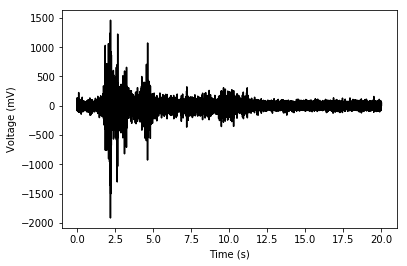

In [12]:
trace = df[df.task==TASK_NAME][setN][trialN][channelN]
time = np.linspace(0, round(np.size(trace)/fs), np.size(trace))

ax = plt.figure
plt.plot(time, trace, color='k')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()

Alternatively

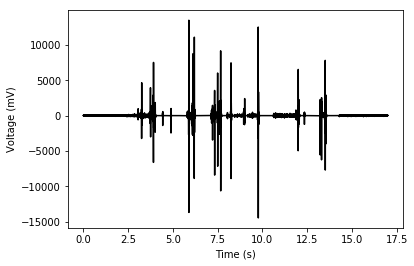

In [13]:
TASK_NAME = 'bottle'
trialN = 4
channelN = 'ch160'
df[df.task==TASK_NAME][channelN].iloc[trialN]

trace = df[df.task==TASK_NAME][channelN].iloc[trialN]
time = np.linspace(0, round(np.size(trace)/fs), np.size(trace))

ax = plt.figure
plt.plot(time, trace, color='k')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()

Time-step duration

In [14]:
#in bottle task, trial 3
print (df[df.task=='bottle'].t_steps.iloc[2])
print (df[df.task=='bottle']['t_steps'][3]) #index change

41598
41598


## Plot trials

### Layout reflecting electrode array disposition

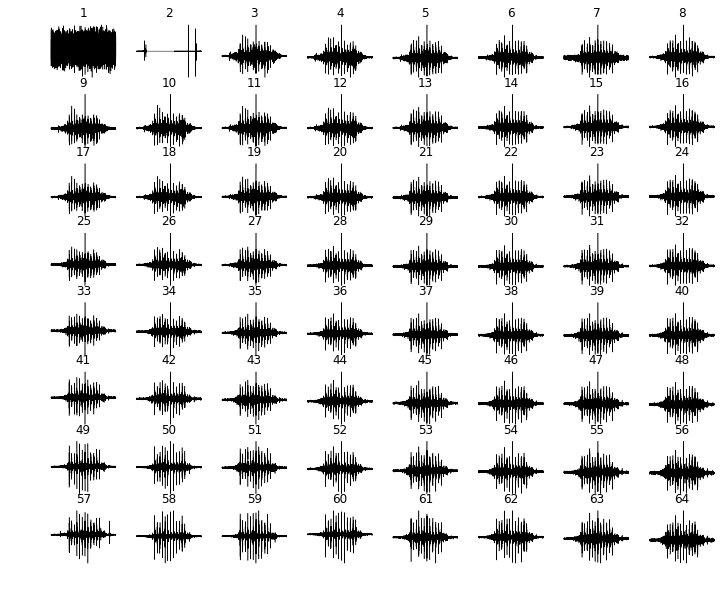

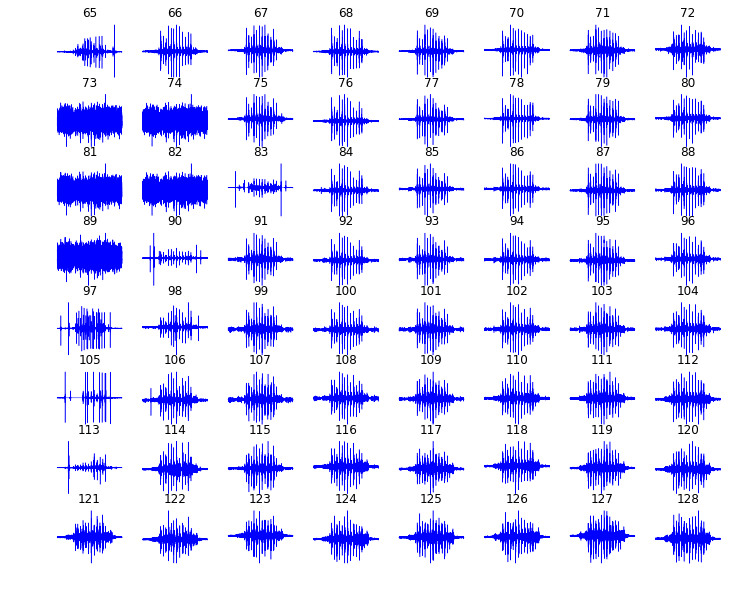

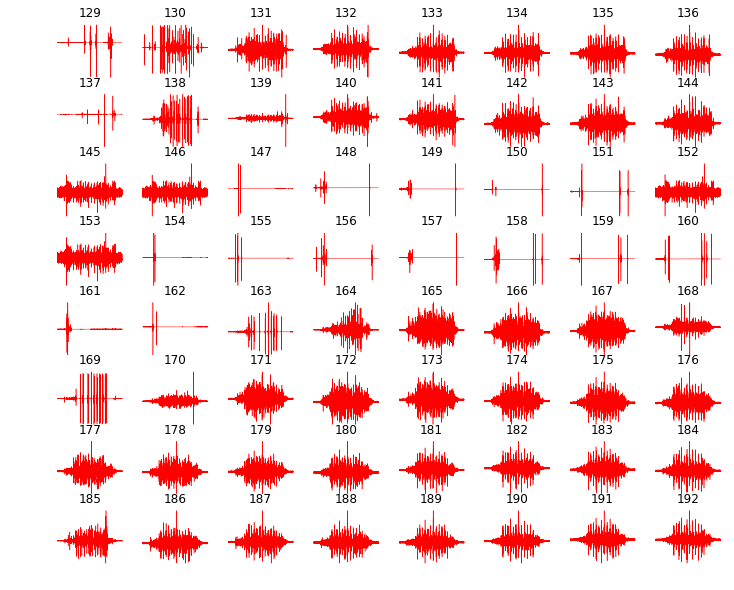

In [15]:
trialN = 9

plt.figure(figsize=(12, 10))

for ch in range(n_ch**2):
        
        channelN = 'ch'+str(ch+1)
        ax = plt.subplot(n_ch,n_ch,ch+1)
        ax.plot(df[channelN].loc[trialN],
                color='k',
                linewidth=.5)
        ax.set_axis_off()
        ax.set_title(ch+1)
        #ax.set_ylim([0, 200])
plt.tight_layout
plt.show()


plt.figure(figsize=(12, 10))

#for ch in range((n_ch**2),2*(n_ch**2)):
for ch in range(n_ch**2):
        
        channelN = 'ch'+str(ch+1+(n_ch**2))
        ax = plt.subplot(n_ch,n_ch,ch+1)
        ax.plot(df[channelN].loc[trialN],
                color='b',
                linewidth=.5)
        ax.set_axis_off()
        ax.set_title(ch+1+(n_ch**2))
        #ax.set_ylim([0, 200])
plt.tight_layout
plt.show()


plt.figure(figsize=(12, 10))

#for ch in range(2*(n_ch**2), n_ch_tot):
for ch in range(n_ch**2):
        
        channelN = 'ch'+str(ch+1+2*(n_ch**2))
        ax = plt.subplot(n_ch,n_ch,ch+1)
        ax.plot(df[channelN].loc[trialN],
                color='r',
                linewidth=.5)
        ax.set_axis_off()
        ax.set_title(ch+1+2*(n_ch**2))
        #ax.set_ylim([0, 200])
        
plt.tight_layout
plt.show()

Set channels with artefacts to NaN

In [ ]:
# This would set it only in the setN column, not the in the channel-wise dataframe
#trace = df[df.task==TASK_NAME][setN][trialN][1]
#trace = (np.nan,)*np.size(trace)

In [ ]:
#plt.figure(figsize=(12, 10))

#TASK_NAME = 'bottle'
#setN = 'set1'
#trialN = 3
#channelN = 54

#for i in range(n_ch**2):
        #if df[df.task==TASK_NAME][setN][trialN][i] < :
            #df[df.task==TASK_NAME][setN][trialN][i] = np.nan
        
        #ax = plt.subplot(n_ch,n_ch,i+1)
        #ax.plot(df[df.task==TASK_NAME][setN][trialN][i],
                #color='k',
                #linewidth=.5)
        #ax.set_axis_off()
        
#plt.tight_layout
#plt.show()

In [ ]:
#ch = 2
#channelN = 'ch'+str(ch)

ch = [2, 137, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162]
channelN = []

for k in range(len(ch)):
    channelN = 'ch' + str(ch[k])
    trace = df[channelN].loc[trialN]
    trace = (np.nan,)*np.size(trace)
    df[channelN].loc[trialN] = np.array(trace)

# Time-frequency decomposition

Example

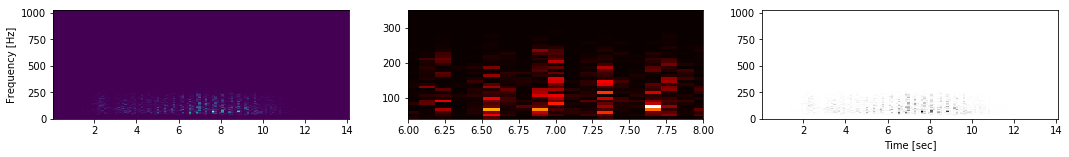

In [16]:
TASK_NAME = 'knife'
trialN = 3
channelN = 'ch10'

x = df[df.task==TASK_NAME][channelN].iloc[trialN]

f, t, Sxx = signal.spectrogram(x, fs)

plt.figure(figsize=(18, 2))
ax = plt.subplot(131)
plt.pcolormesh(t, f, Sxx)
ax.set_ylabel('Frequency [Hz]')

ax = plt.subplot(132)
plt.pcolormesh(t, f, Sxx, cmap='hot')
ax.set_ylim([40,350])
ax.set_xlim([6,8])

ax = plt.subplot(133)
plt.pcolormesh(t, f, Sxx, cmap='binary')

plt.xlabel('Time [sec]')
plt.show()

Compare trials over channels for one task (within subject)

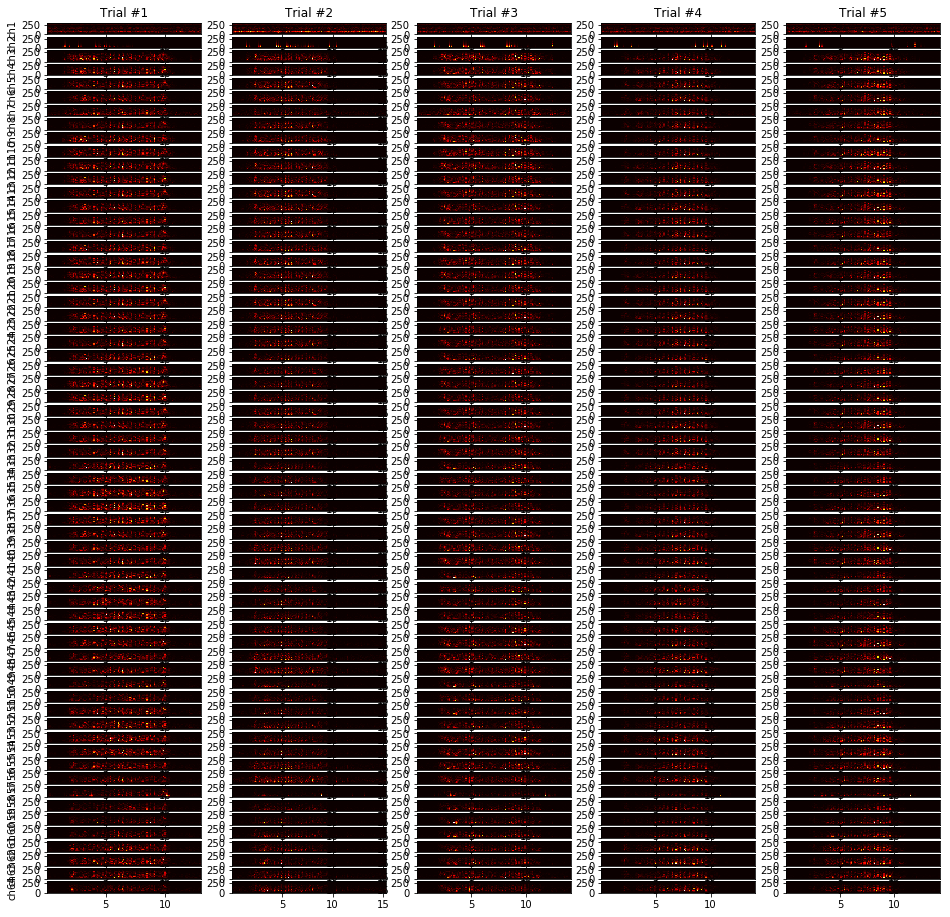

In [17]:
TASK_NAME = 'knife'
trialN_tot = np.size(df[df.task==TASK_NAME],0)

plt.figure(figsize=(16, 16))
 
#for ch in range(n_ch_tot): #each channel, rows
for ch in range(n_ch**2): #each channel, rows
    for trialN in range(trialN_tot): #each trial, columns
        
        ax = plt.subplot(n_ch**2, trialN_tot, trialN_tot*ch+trialN+1)
        #ax = plt.subplot(192, 5, 5*ch+trialN+1 )
        #ax = plt.subplot((n_ch_tot,np.size(df[df.task==TASK_NAME],0),trialN_tot*ch+trialN+1)
        
        channelN = 'ch'+str(ch+1)
        x = df[df.task==TASK_NAME][channelN].iloc[trialN]
        f, t, Sxx = signal.spectrogram(x, fs)
        ax.pcolormesh(t, f, Sxx, cmap='hot')
        ax.set_ylim([0, 300])
        
        if trialN == 0:
            ax.set_ylabel('ch'+str(ch+1))
            
        if ch == 0:
            ax.set_title('Trial #'+str(trialN+1))
        
        #ax.set_axis_off()
plt.tight_layout
plt.show()

It would be better to split on more columns, on a larger window.

Prediction with just action onset?

All matrix

In [18]:
trialN_tot = max(df.index)+1
time_dim = np.zeros((n_ch_tot, trialN_tot, 5))
freq_dim = np.zeros((trialN_tot, n_ch_tot))

t_W = 5
f_W = 6

df['pred'] = ''

for w in range(f_W*t_W*n_ch_tot):
    df['p'+str(w)] = ''

for trialN in df.index: #each trial, columns
    
    F = []
    
    for chN, ch in enumerate(df.columns[7:7+n_ch_tot]): #each channel, rows

        x = df[ch].loc[trialN]
        
        if np.isnan(x[0])==False:
            f, t, Sxx = signal.spectrogram(x, fs)
        
            ind = np.where(Sxx/np.max(Sxx) > 0.05) #5% threshold
            time_dim[chN, trialN, :] = np.unique(ind[0])[0:t_W]
            
            freq_dim[trialN, chN] = np.argmax(np.sum(Sxx[:, time_dim[chN,trialN,:].astype(int)], axis=1))
            W = np.reshape(Sxx[0:f_W, time_dim[chN,trialN,:].astype(int)], (t_W*f_W)) #time-frequency window of interest
            F.append(W)
        else:
            W = (np.nan,)*(t_W*f_W) #time-frequency window of interest
            F.append(W)
    
    df['pred'].loc[trialN] = np.reshape(F, ((t_W*f_W)*np.size(F,0)))

df['freq'] = freq_dim.tolist()

A column for each t-f pixel

In [19]:
df[df.columns[200:(200+f_W*t_W*n_ch_tot)]] = df['pred'].tolist()

Set ticks for heat map

In [20]:
yticks = []
yticks.append(np.size(df[df.task==task_names[0]].trial)/2)

for i in range(1, len(task_names)):
    yticks.append(np.size(df[df.task==task_names[i]].trial)/2+np.size(df[df.task==task_names[i-1]].trial)/2+yticks[i-1])

Plot heat map

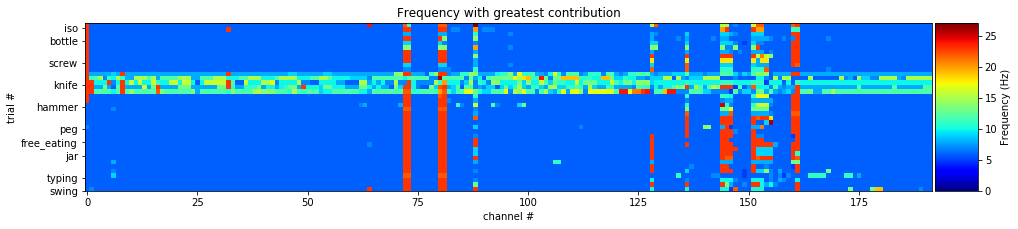

In [21]:
plt.figure(figsize=(16,40))
ax = plt.gca()

im = ax.imshow(freq_dim, interpolation='nearest', cmap=cm.jet, vmax=freq_dim.max(), vmin=0)
#im = ax.imshow(freq_dim, interpolation='nearest', cmap=cm.jet, vmax=10, vmin=0)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

ax.set_yticks(yticks)
ax.set_yticklabels(task_names)

plt.colorbar(im, cax=cax)
plt.ylabel('Frequency (Hz)')
ax.set_xlabel('channel #')
ax.set_ylabel('trial #')
ax.set_title('Frequency with greatest contribution')
plt.show()

- check time-frequency resolution in spectrogram (check time length from spectogram properties)
- create time-frequency window
- reshape it into array for prediction

## Classifiers

In [32]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [23]:
predictors=df.columns[200:(200+f_W*t_W*n_ch_tot)]

In [24]:
X = df[predictors]
y = df['task']

In [25]:
X

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p5750,p5751,p5752,p5753,p5754,p5755,p5756,p5757,p5758,p5759
0,0.0380284,0.199419,6.14711e-05,0.0334107,0.081632,0.048185,0.0310497,0.000775155,0.00595597,0.00254416,...,0.0546779,0.00233807,0.0381187,0.230241,0.0161706,5.09271,4.04652,3.94645,4.4582,9.27918
1,0.00108654,0.0012199,1.6832e-05,0.0117637,0.0456344,0.00129417,0.00243109,0.00282566,0.00996371,0.000602182,...,0.0119748,0.031759,0.164034,0.099396,0.137785,2.9274,1.62371,2.13853,2.00291,1.52592
2,4.16599e-08,0.00290941,0.00691294,0.0075918,0.026074,0.000231371,0.000129885,0.00404862,0.00343743,0.00286909,...,0.0863027,0.010787,0.115857,0.0886984,0.0418686,0.0163864,2.06378,2.9848,1.62333,2.02377
3,0.0580663,0.0301392,0.0166814,0.00535973,0.00151065,0.003148,0.00215835,0.00316236,0.000161657,0.000306548,...,0.00730804,0.0274566,3.11583,0.697535,0.878795,2.74853,3.12407,9.6544,19.8967,25.8013
4,8.43871e-05,0.00799813,0.00912731,0.000368878,0.0272253,0.00155184,0.000123849,0.00238268,0.00130204,0.00262573,...,0.022317,0.0188802,0.25263,0.0821142,0.125511,1.64401,1.59651,1.15666,0.737737,0.266041
5,0.0517259,0.00455253,0.00162576,0.000900328,3.87421e-05,0.0031297,0.0014295,0.000948515,0.000598296,0.000408993,...,0.168054,0.0707553,0.017756,0.0301369,0.231123,1.5374,0.662796,3.23699,1.6033,1.56708
6,0.0312942,0.0129019,0.00388501,0.0623261,0.0132788,0.00435053,0.00138276,0.00106411,0.000746154,0.00473577,...,0.0178994,0.011979,0.00687185,0.382919,0.865865,3.744,2.13182,1.27275,9.91132,1.29404
7,0.00311792,0.0150417,0.0178884,0.00171234,0.00809971,1.76823e-05,0.00164607,0.000873731,0.000927467,0.00188616,...,0.0700144,0.0864016,0.0506269,0.0033859,0.103973,1.927,1.05018,2.19485,2.42325,1.58951
8,0.000468899,0.0224758,8.35493e-07,0.00237229,0.0403177,0.00348605,0.000732696,0.00134055,0.00262378,0.000685867,...,0.0897445,0.0561993,0.0771593,0.0059379,0.0875114,0.645657,2.71798,2.58005,1.4511,2.98487
9,0.0161247,0.031863,0.00880689,0.00517267,0.0137881,0.000605718,0.00375306,0.00128981,0.000702682,0.00163131,...,0.489155,0.163291,0.0768912,0.177862,0.0284089,2.73406,2.43008,0.296782,0.691021,4.79421


In [26]:
y

0             iso
1          bottle
2          bottle
3          bottle
4          bottle
5          bottle
6           screw
7           screw
8           screw
9           screw
10          screw
11          knife
12          knife
13          knife
14          knife
15          knife
16         hammer
17         hammer
18         hammer
19         hammer
20         hammer
21            peg
22            peg
23            peg
24            peg
25            peg
26    free_eating
27            jar
28            jar
29            jar
30            jar
31            jar
32         typing
33         typing
34         typing
35         typing
36         typing
37          swing
Name: task, dtype: object

In [40]:
#SVM = sklearn.svm.SVC(kernel='rbf')
#SVM.fit(X, y)  
#SVM.score(X,y)

rfc = RandomForestClassifier()
rfc.fit(X, y)
rfc.score(X,y)

1.0

In [41]:
#scoreSVM=([]);
scoreRFC=([]);

In [42]:
kf = KFold(n_splits=5) 
#KFold(n_splits=2, random_state=None, shuffle=False)

In [43]:
for train,test in kf.split(X):
    
    ## SVM
    #SVM =  sklearn.svm.SVC(kernel='rbf')
    #SVM.fit(X.iloc[train],y.iloc[train])
    #scoreSVM.append(SVM.score(X.iloc[test], y.iloc[test])) #accuracy
    
    ## RFC
    RFC =  RandomForestClassifier()
    RFC.fit(X.iloc[train],y.iloc[train])
    scoreRFC.append(RFC.score(X.iloc[test], y.iloc[test])) #accuracy

In [44]:
print (np.mean(scoreSVM))
print (np.std(scoreSVM))
print ()
print (np.mean(scoreRFC))
print (np.std(scoreRFC))

0.0
0.0

0.05357142857142857
0.06585388898066348


With NaN, after artefact pre-processing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer

X_train = [[0, 0, np.nan], [np.nan, 1, 1]]
Y_train = [0, 1]
X_test_1 = [0, 0, np.nan]
X_test_2 = [0, np.nan, np.nan]
X_test_3 = [np.nan, 1, 1]

# Create our imputer to replace missing values with the mean e.g.
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train_imp, Y_train)

for X_test in [X_test_1, X_test_2, X_test_3]:
    # Impute each test item, then predict
    X_test_imp = imp.transform(X_test)
    print(X_test, '->', clf.predict(X_test_imp))